<a href="https://colab.research.google.com/github/RUHiLoKHande/Stock-Price-Prediction-using-historical-data-with-a-simple-Linear-Regression/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
data = yf.download("AAPL", start="2022-01-01", end="2023-01-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [6]:
data.head(2)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,179.076569,179.932557,174.845883,174.963944,104487900
2022-01-04,176.803818,179.991605,176.233164,179.686603,99310400


In [7]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (High, AAPL)    251 non-null    float64
 2   (Low, AAPL)     251 non-null    float64
 3   (Open, AAPL)    251 non-null    float64
 4   (Volume, AAPL)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None


In [14]:
print(data.columns)


Index(['AAPL', 'Target', 'Prediction'], dtype='object', name='Ticker')


In [15]:
# Check if the 'AAPL' data is stored in the DataFrame as a sub-column.
print(data['AAPL'].head())


Date
2022-01-03    179.076569
2022-01-04    176.803818
2022-01-05    172.100861
2022-01-06    169.227921
2022-01-07    169.395172
Name: AAPL, dtype: float64


In [16]:
# Fix the column reference if 'AAPL' is the actual stock price column
data = data[['AAPL']]  # Use 'AAPL' column as the closing prices

# Add a new column 'Prediction' for forecasting
future_days = 30
data['Prediction'] = data['AAPL'].shift(-future_days)

# Drop rows with NaN values
data.dropna(inplace=True)
print(data.head())


Ticker            AAPL  Prediction
Date                              
2022-01-03  179.076569  170.221786
2022-01-04  176.803818  169.985382
2022-01-05  172.100861  166.369904
2022-01-06  169.227921  164.813370
2022-01-07  169.395172  161.877701


<ipython-input-16-f2e38481645b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data['AAPL'].shift(-future_days)
<ipython-input-16-f2e38481645b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [17]:
data.reset_index(inplace=True)


In [20]:
import numpy as np
# Define features (X) and target (y)
X = np.array(data[['AAPL']])  # Use 'Close' prices as features
y = np.array(data['Prediction'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [22]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 110.74006864747571
R² Score: 0.01764959285415657


In [23]:
# Predict future stock prices
last_30_days = np.array(data[['AAPL']])[-30:]  # Last 30 days of data
future_predictions = model.predict(last_30_days)

# Display predictions
print("Future Predictions for the next 30 days:")
print(future_predictions)


Future Predictions for the next 30 days:
[149.16490589 148.28751158 148.34172937 148.10512512 147.99996824
 148.76399878 148.00654594 148.66870337 148.88887353 148.90694697
 148.82972246 149.46723383 149.8254189  150.30026674 149.80899242
 149.0613909  150.85891426 150.46457469 150.02258995 149.09918982
 148.08870118 148.04426112 148.13313617 148.22858891 147.46658853
 149.44154223 149.90730007 149.6735964  149.96325871 149.75753564]


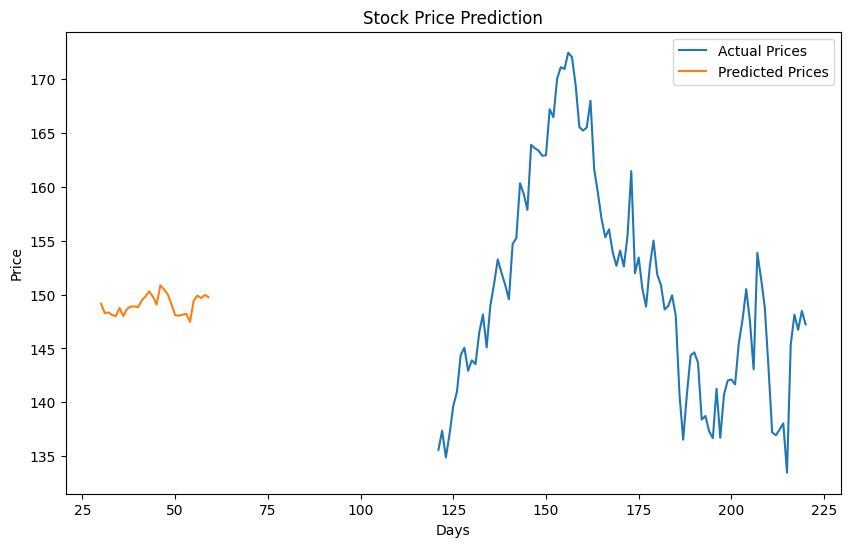

In [26]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['AAPL'][-100:], label="Actual Prices")
plt.plot(range(len(data['AAPL'][-30:]), len(data['AAPL'][-30:]) + 30), future_predictions, label="Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()
